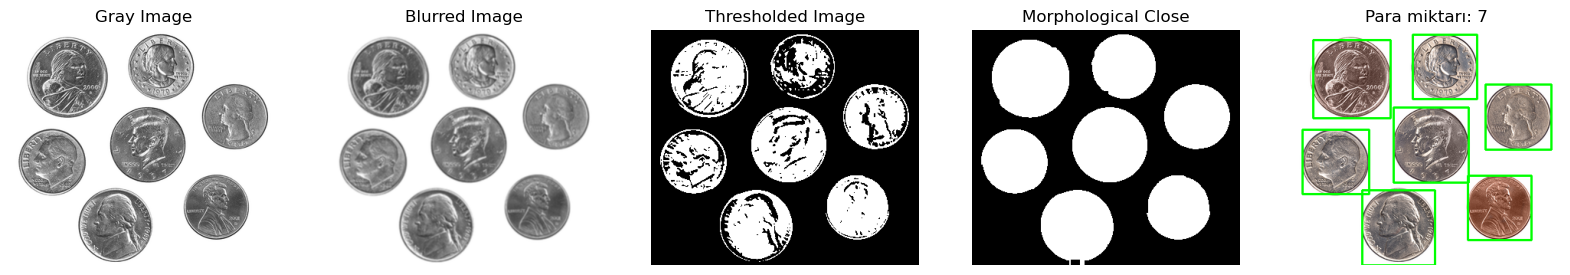

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giriş görselini yükleyin
img_path = 'coins01.png'  # Görüntü dosyanızın adını yazın
image = cv2.imread(img_path)

# Görüntüyü gri tonlamaya çevirin
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian bulanıklaştırma uygulayın
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Eşikleme işlemi uygulayın
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
# _, thresh = cv2.threshold(blurred, 150, 255,cv2.THRESH_BINARY)

# Morfolojik açma ve kapama işlemleri uygulayarak küçük gürültüleri giderin
kernel = np.ones((3, 3), np.uint8)
# morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
morph = cv2.dilate(thresh, kernel, iterations=5)
morph = cv2.erode(morph, kernel, iterations=5)

# Konturları bulun
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Minimum kontur alanı eşiği
min_contour_area = 500
coin_count = 0

# Bozuk paraları sayın ve görüntüye dikdörtgen çizin
for cnt in contours:
    if cv2.contourArea(cnt) > min_contour_area:
        coin_count += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Sonuçları görselleştirin
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gray Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
axes[2].set_title("Thresholded Image")
axes[2].axis("off")

axes[3].imshow(cv2.cvtColor(morph, cv2.COLOR_BGR2RGB))
axes[3].set_title("Morphological Close")
axes[3].axis("off")

axes[4].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[4].set_title(f'Para miktarı: {coin_count}')
axes[4].axis("off")

plt.show()

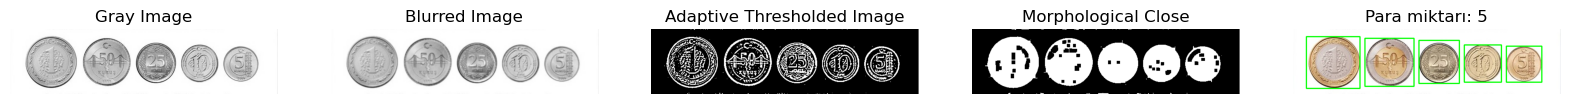

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giriş görselini yükleyin
img_path = 'image2.png'  # Kullanıcının yüklediği görüntü yolu
image = cv2.imread(img_path)

# Görüntüyü gri tonlamaya çevirin
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian bulanıklaştırma uygulayın
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Adaptif Eşikleme işlemi uygulayın
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Morfolojik kapatma işlemi uygulayın
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

# Konturları bulun
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Minimum kontur alanı eşiği
min_contour_area = 500
coin_count = 0

# Bozuk paraları sayın ve görüntüye dikdörtgen çizin
for cnt in contours:
    if cv2.contourArea(cnt) > min_contour_area:
        coin_count += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Sonuçları görselleştirin
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gray Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
axes[2].set_title("Adaptive Thresholded Image")
axes[2].axis("off")

axes[3].imshow(cv2.cvtColor(morph, cv2.COLOR_BGR2RGB))
axes[3].set_title("Morphological Close")
axes[3].axis("off")

axes[4].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[4].set_title(f'Para miktarı: {coin_count}')
axes[4].axis("off")

plt.show()


1 TL: 1 adet
50 kuruş: 1 adet
25 kuruş: 1 adet
10 kuruş: 1 adet
5 kuruş: 1 adet
Toplam Değer: 1.90 TL


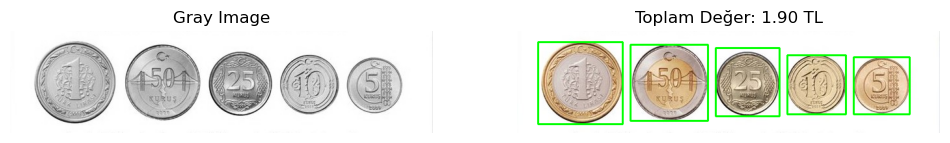

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giriş görselini yükleyin
img_path = 'image2.png'  # Görüntü yolu
image = cv2.imread(img_path)

# Görüntüyü gri tonlamaya çevirin
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian bulanıklaştırma uygulayın
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Adaptif Eşikleme işlemi uygulayın
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Morfolojik kapatma işlemi uygulayın
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

# Konturları bulun
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Minimum kontur alanı eşiği
min_contour_area = 500

# Para sınıfları ve toplam tutar için sözlük (alan aralıkları küçükten büyüğe sıralandı)
coin_values = {
    "1 TL": {"count": 0, "value": 1.0, "area_range": (5500, 6000)},
    "50 kuruş": {"count": 0, "value": 0.5, "area_range": (6000, 7000)},
    "25 kuruş": {"count": 0, "value": 0.25, "area_range": (7000, 9000)},
    "10 kuruş": {"count": 0, "value": 0.1, "area_range": (9000, 11000)},
    "5 kuruş": {"count": 0, "value": 0.05, "area_range": (11000, 13000)}
}
total_value = 0.0

# Bozuk paraları sayın ve değerlerini belirleyin
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_contour_area:
        # Her alan için belirlenen aralığa göre para türünü belirleyin
        for coin_type, properties in coin_values.items():
            min_area, max_area = properties["area_range"]
            if min_area <= area < max_area:
                coin_values[coin_type]["count"] += 1
                total_value += properties["value"]
                # Konturun etrafına dikdörtgen çiz
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                break

# Sonuçları göster
for coin_type, properties in coin_values.items():
    print(f"{coin_type}: {properties['count']} adet")

print(f"Toplam Değer: {total_value:.2f} TL")

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gray Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Toplam Değer: {total_value:.2f} TL')
axes[1].axis("off")

plt.show()


Kontur Alanı: 5666.5
Kontur Alanı: 6347.5
Kontur Alanı: 7416.0
Kontur Alanı: 10413.5
Kontur Alanı: 12022.5


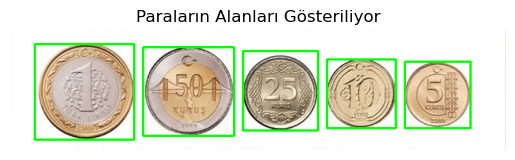

Bulunan alan değerleri: [5666.5, 6347.5, 7416.0, 10413.5, 12022.5]


In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giriş görselini yükleyin
img_path = 'image2.png'  # Kullanıcının yüklediği görüntü yolu
image = cv2.imread(img_path)

# Görüntüyü gri tonlamaya çevirin
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian bulanıklaştırma uygulayın
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Adaptif Eşikleme işlemi uygulayın
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Morfolojik kapatma işlemi uygulayın
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

# Konturları bulun
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Minimum kontur alanı eşiği
min_contour_area = 500

# Bozuk paraların alanlarını hesapla ve göster
coin_areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_contour_area:
        coin_areas.append(area)
        # Konturun etrafına dikdörtgen çiz
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Her kontur alanını ekrana yazdır
        print(f"Kontur Alanı: {area}")

# Sonuçları görselleştirin
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Paraların Alanları Gösteriliyor")
plt.axis("off")
plt.show()

print("Bulunan alan değerleri:", coin_areas)
